- WE have Given a Cricket Data set to Analysis
- Choose strike rate and average as the two factors on which you will cluster the data


In [1]:
# Importing the Important Libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Cricket = pd.read_csv("Cricket.csv")
Cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar�(INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara�(Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting�(AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya�(Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene�(Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
Cricket.shape

(79, 13)

In [4]:
Cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [5]:
Cricket.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Mat,79.0,245.075949,74.211716,128.00,188.000,232.00,281.500,463.00
Inns,79.0,230.544304,70.321022,127.00,177.000,217.00,261.500,452.00
NO,79.0,30.037975,14.421710,4.00,17.500,29.00,40.000,70.00
Runs,79.0,7618.139241,2551.873313,5080.00,5759.000,6798.00,8739.500,18426.00
Ave,79.0,38.523291,5.919093,23.57,34.600,37.87,41.845,53.94
BF,79.0,9684.455696,3193.835825,5504.00,7393.500,9134.00,10976.000,21367.00
SR,79.0,79.295316,9.925307,60.57,73.725,77.73,85.180,117.00
100,79.0,11.556962,8.092014,0.00,6.000,10.00,15.500,49.00
50,79.0,46.443038,16.351701,23.00,34.500,42.00,54.000,96.00
0,79.0,13.253165,5.925755,3.00,9.000,13.00,16.000,34.00


In [6]:
Cricket.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [7]:
Cricket.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
74    False
75    False
76    False
77    False
78    False
Length: 79, dtype: bool

In [8]:
df = Cricket[["Player","Ave","SR"]]
df

,Player,Ave,SR
0,SR Tendulkar�(INDIA),44.83,86.23
1,KC Sangakkara�(Asia/ICC/SL),41.98,78.86
2,RT Ponting�(AUS/ICC),42.03,80.39
3,ST Jayasuriya�(Asia/SL),32.36,91.20
4,DPMD Jayawardene�(Asia/SL),33.37,78.96
...,...,...,...
74,CG Greenidge�(WI),45.03,64.92
75,Misbah-ul-Haq�(PAK),43.40,73.75
76,PD Collingwood�(ENG),35.36,76.98
77,A Symonds�(AUS),39.75,92.44


In [9]:
df.shape

(79, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Ave     79 non-null     float64
 2   SR      79 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


<AxesSubplot:xlabel='Ave'>

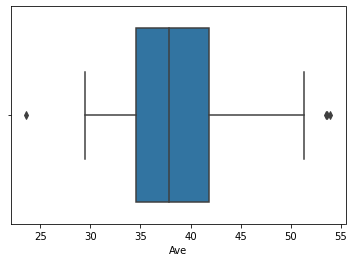

In [11]:
sns.boxplot(df.Ave)

In [12]:
# Q1 = df.Ave.quantile(0.25)
# Q3 = df.Ave.quantile(0.75)
# IQR = Q3-Q1
# df = df[(df.Ave>=Q1-1.5*IQR)&(df.Ave<=Q3+1.5*IQR)]

<AxesSubplot:xlabel='SR'>

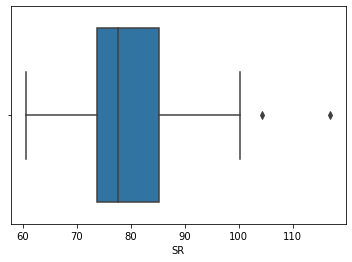

In [13]:
sns.boxplot(df.SR)

In [14]:
# Q1 = df.SR.quantile(0.25)
# Q3 = df.SR.quantile(0.75)
# IQR = Q3-Q1
# df = df[(df.SR>=Q1-1.5*IQR)&(df.SR<=Q3+1.5*IQR)]


In [15]:
df.shape

(79, 3)

<AxesSubplot:xlabel='SR'>

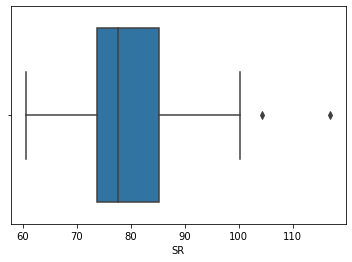

In [16]:
sns.boxplot(df.SR)

### All Data is clean

# Let's do Rescalling

In [17]:
df2 = df[["Ave","SR"]]
df2.head(2)

,Ave,SR
0,44.83,86.23
1,41.98,78.86


In [18]:
# Import library for rescalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)
df2_scaled = pd.DataFrame(df2_scaled)
df2_scaled.columns = df2.columns
df2_scaled.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [19]:
df2_scaled.shape

(79, 2)

# Modelling

In [20]:
# Importing Library

from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4,max_iter=40,random_state=100)
kmean.fit(df2_scaled)

KMeans(max_iter=40, n_clusters=4, random_state=100)

In [21]:
kmean.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2])

# Finding optimal Cluster

## Method 1


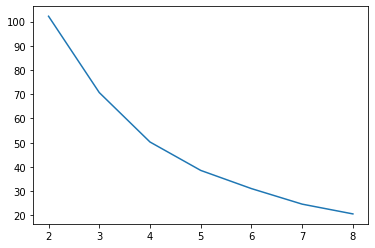

In [22]:
ssd=[]
range_n_cluster=[2,3,4,5,6,7,8]
for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)
    ssd.append(kmeans.inertia_)
#plot the ssd for each n_cluster
plt.plot(ssd)
plt.xticks([0,1,2,3,4,5,6],[2,3,4,5,6,7,8])
plt.show()

# Method 2

- Silhouette Score

In [23]:
# Import Metric
from sklearn.metrics import silhouette_score

In [24]:
range_n_cluster=[2,3,4,5,6,7,8]

for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2_scaled)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(df2_scaled,cluster_labels)
    print("for n_clusters = {0},the Silhouette Score is {1}".format(num_clusters,silhouette_avg))

for n_clusters = 2,the Silhouette Score is 0.37632823237612395
for n_clusters = 3,the Silhouette Score is 0.36700102657579503
for n_clusters = 4,the Silhouette Score is 0.3836904829421138
for n_clusters = 5,the Silhouette Score is 0.3686963474429171
for n_clusters = 6,the Silhouette Score is 0.39076607561074883
for n_clusters = 7,the Silhouette Score is 0.38301845780271
for n_clusters = 8,the Silhouette Score is 0.36851063280273477


- Chosing 5 as optional clustring

In [54]:
# Final model with k=3
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df2_scaled)

KMeans(max_iter=50, n_clusters=5)

In [55]:
kmeans.labels_

array([1, 3, 3, 4, 2, 3, 3, 3, 3, 0, 0, 3, 4, 1, 2, 1, 0, 0, 0, 3, 0, 3,
       2, 3, 4, 1, 0, 4, 2, 3, 2, 2, 3, 2, 1, 2, 2, 0, 1, 3, 2, 0, 1, 2,
       2, 2, 3, 2, 2, 3, 4, 3, 2, 0, 2, 2, 3, 0, 2, 0, 2, 4, 3, 0, 1, 0,
       0, 2, 3, 2, 0, 2, 2, 2, 3, 3, 2, 0, 2])

In [56]:
df["Cluster_id"] = kmeans.labels_
df.head()

,Player,Ave,SR,Cluster_id
0,SR Tendulkar�(INDIA),44.83,86.23,1
1,KC Sangakkara�(Asia/ICC/SL),41.98,78.86,3
2,RT Ponting�(AUS/ICC),42.03,80.39,3
3,ST Jayasuriya�(Asia/SL),32.36,91.20,4
4,DPMD Jayawardene�(Asia/SL),33.37,78.96,2


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      79 non-null     object 
 1   Ave         79 non-null     float64
 2   SR          79 non-null     float64
 3   Cluster_id  79 non-null     int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 2.3+ KB


In [58]:
df[(df.Cluster_id == 0)]

,Player,Ave,SR,Cluster_id
9,BC Lara�(ICC/WI),40.48,79.51,0
10,TM Dilshan�(SL),39.27,86.23,0
16,PA de Silva�(SL),34.90,81.13,0
17,CH Gayle�(ICC/WI),37.33,85.11,0
18,Saeed Anwar�(PAK),39.21,80.67,0
20,Yuvraj Singh�(Asia/INDIA),36.55,87.67,0
26,HH Gibbs�(SA),36.13,83.26,0
37,GC Smith�(Afr/SA),37.98,80.81,0
41,Shoaib Malik�(PAK),35.23,81.72,0
53,JN Rhodes�(SA),35.11,80.90,0


In [59]:
df[(df.Cluster_id == 1)]

,Player,Ave,SR,Cluster_id
0,SR Tendulkar�(INDIA),44.83,86.23,1
13,MS Dhoni�(Asia/INDIA),51.32,88.69,1
15,AB de Villiers�(Afr/SA),53.55,100.25,1
25,V Kohli�(INDIA),53.94,90.99,1
34,HM Amla�(SA),50.25,89.05,1
38,MG Bevan�(AUS),53.58,74.16,1
42,IVA Richards�(WI),47.00,90.20,1
64,MEK Hussey�(AUS),48.15,87.16,1


In [60]:
df[(df.Cluster_id == 2)]

,Player,Ave,SR,Cluster_id
4,DPMD Jayawardene�(Asia/SL),33.37,78.96,2
14,M Azharuddin�(INDIA),36.92,74.02,2
22,MS Atapattu�(SL),37.57,67.72,2
28,SP Fleming�(ICC/NZ),32.40,71.49,2
30,SR Waugh�(AUS),32.90,75.91,2
31,A Ranatunga�(SL),35.84,77.90,2
33,Younis Khan�(PAK),31.24,75.29,2
35,Saleem Malik�(PAK),32.88,76.41,2
36,NJ Astle�(NZ),34.92,72.64,2
40,A Flower�(ZIM),35.34,74.59,2


In [61]:
df[(df.Cluster_id == 3)]

,Player,Ave,SR,Cluster_id
1,KC Sangakkara�(Asia/ICC/SL),41.98,78.86,3
2,RT Ponting�(AUS/ICC),42.03,80.39,3
5,Inzamam-ul-Haq�(Asia/PAK),39.52,74.24,3
6,JH Kallis�(Afr/ICC/SA),44.36,72.89,3
7,SC Ganguly�(Asia/INDIA),41.02,73.70,3
8,R Dravid�(Asia/ICC/INDIA),39.16,71.24,3
11,Mohammad Yousuf�(Asia/PAK),41.71,75.10,3
19,S Chanderpaul�(WI),41.60,70.74,3
21,DL Haynes�(WI),41.37,63.09,3
23,ME Waugh�(AUS),39.35,76.90,3


In [62]:
df.groupby("Cluster_id").agg({"SR":["min","max","mean"],"Ave":["min","max","mean"]})

SR                       Ave                  
              min     max       mean    min    max       mean
Cluster_id                                                   
0           77.16   92.44  84.306471  34.90  43.30  38.501176
1           74.16  100.25  88.341250  44.83  53.94  50.327500
2           60.57   81.25  72.868519  29.49  37.57  33.742963
3           63.09   82.03  74.159048  38.64  45.03  42.019048
4           91.20  117.00  99.933333  23.57  35.89  32.123333

In [63]:
df.Cluster_id.value_counts()

2    27
3    21
0    17
1     8
4     6
Name: Cluster_id, dtype: int64

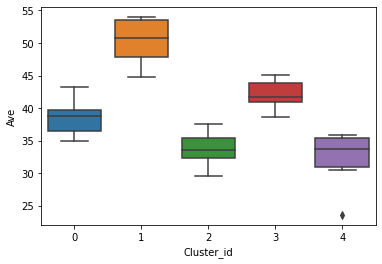

In [64]:
#plot
sns.boxplot(x="Cluster_id",y='Ave',data=df)
plt.show()